Introduction
The Grainyhead-like protein 2 homolog (GRHL2) is a crucial transcription factor that plays a significant role in various biological processes, particularly primary neurulation and epithelial development. As a transcription factor, GRHL2 exerts its influence by binding directly to DNA sequences, modulating the expression of target genes either as an activator or repressor. The consensus binding sequence for GRHL2 is identified as 5'-AACCGGTT-3', which serves as a key site for the protein's interaction with DNA, influencing gene regulatory networks vital for cell fate determination and tissue morphology.

Biological Significance of GRHL2
GRHL2 is implicated in a myriad of developmental and physiological pathways. In the context of neurulation, GRHL2 is essential for the proper closure of the neural tube, a fundamental process in the early stages of embryonic development. Mutations or dysregulation in GRHL2 expression are associated with neural tube defects, highlighting its critical role in neurodevelopment. Furthermore, in epithelial tissues, GRHL2 is vital for maintaining the barrier integrity and cellular polarity—key aspects that are disrupted in various pathological conditions, including cancer. Its role extends to the epithelial-mesenchymal transition (EMT), a process pivotal in cancer metastasis, where GRHL2 functions as a regulatory gatekeeper either promoting or inhibiting this transition.

Studying the binding behavior of GRHL2 to DNA is scientifically valuable for several reasons. Firstly, mapping the specific DNA motifs recognized by GRHL2 can elucidate how transcriptional networks are controlled during development and in disease states. By analyzing microarray data to identify DNA sequences with high binding affinity to GRHL2, researchers can infer potential regulatory mechanisms that the protein may influence under physiological or pathological conditions.

Moreover, the ability to pinpoint novel DNA binding sites or variations in known sites can lead to a deeper understanding of the specificity and plasticity of GRHL2 in gene regulation. Such insights are crucial for developing therapeutic strategies aimed at modulating GRHL2 activity in diseases, particularly those involving aberrant cell proliferation and differentiation like cancer.

Methodological Approach
In this study, a comprehensive analysis of DNA microarray data is conducted to explore the binding characteristics of GRHL2 across a vast array of DNA sequences. Through the application of unsupervised machine learning techniques, such as clustering based on k-mer frequency within sequences, this research aims to uncover motifs that exhibit strong affinity to GRHL2. This method allows for the classification of sequences based on motif similarity, facilitating the identification of potent GRHL2 binding sites that could be critical in regulating key target genes involved in neurulation and epithelial integrity.

In [4]:
import pandas as pd
import numpy as np

# Load the data
file_path = '/Users/noahnicol/Desktop/Desktop/Job_Stuff/Proteovista/CUB S_ML Project/GRHL2_mastersheet.csv'
data = pd.read_csv(file_path)

# Select the columns to normalize
columns_to_normalize = ['1_GBNorm',	'2_GBNorm',	'3_GBNorm',	'4_GBNorm',	'5_GBNorm',	'6_GBNorm']
data_to_normalize = data[columns_to_normalize]
print("Columns found")

# Perform quantile normalization
# Step 1: Sort each column and compute the rank means
sorted_data = np.sort(data_to_normalize.values, axis=0)
mean_ranks = np.mean(sorted_data, axis=1)

# Step 2: Assign ranks to the original data and replace with the corresponding mean rank
ranks = data_to_normalize.rank(method='min').astype(int) - 1
normalized_data = pd.DataFrame(index=data_to_normalize.index, columns=data_to_normalize.columns)
for col in data_to_normalize.columns:
    normalized_data[col] = mean_ranks[ranks[col]]

# Append the normalized columns to the original DataFrame with new names
for col in columns_to_normalize:
    data[col + '_Qnorm'] = normalized_data[col]

# Optionally, save the data with normalized columns to CSV
data.to_csv('Quantile_normalized_data.csv', index=False)

print("Quantile normalization completed and new columns added.")


Columns found
Quantile normalization completed and new columns added.


In [3]:
# LOAD DATA AND SELECT COLUMNS
import pandas as pd
# Load the specific columns from the CSV file
file_path = '/Users/noahnicol/Desktop/Desktop/Job_Stuff/Proteovista/CUB S_ML Project/data_with_quantile_normalized_columns.csv'
columns = ['FeatureNum', 'Sequence', '1_GBNorm_Qnorm', '2_GBNorm_Qnorm', '3_GBNorm_Qnorm']
data = pd.read_csv(file_path, usecols=columns)
data['Average_Binding'] = data[['1_GBNorm_Qnorm', '2_GBNorm_Qnorm', '3_GBNorm_Qnorm']].mean(axis=1)
print(data['Average_Binding'].describe)

<bound method NDFrame.describe of 0         0.791278
1         0.850333
2         2.580611
3         1.049389
4         0.635111
            ...   
772727    0.671611
772728    0.536389
772729    0.906000
772730    0.575667
772731    0.653444
Name: Average_Binding, Length: 772732, dtype: float64>


In [4]:
# K-MER COUNTING
from sklearn.feature_extraction.text import CountVectorizer
motif_len = 8
def kmerize(sequence, k=motif_len):
    return [sequence[i:i+k] for i in range(len(sequence) - k + 1)]

# Apply k-merization to the 'Sequence' column
data['kmers'] = data['Sequence'].apply(lambda x: ' '.join(kmerize(x)))

# Vectorize the k-mers into numerical features
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(data['kmers'])
print(X.shape)

(772732, 65411)


In [5]:
from sklearn.decomposition import TruncatedSVD

# Using TruncatedSVD to reduce dimensionality of a sparse matrix
SVD_components = 100
svd = TruncatedSVD(n_components=SVD_components)  # You can adjust the number of components
X_reduced = svd.fit_transform(X)
print(f"Reduced from {X.shape[1]} to {X_reduced.shape[1]} features")

# Calculate explained variance ratio
explained_variance_ratio = svd.explained_variance_ratio_
cumulative_variance_ratio = explained_variance_ratio.cumsum()

print("\nCumulative Explained Variance Ratio:")
print(cumulative_variance_ratio)

Reduced from 65411 to 100 features

Cumulative Explained Variance Ratio:
[0.01079608 0.01932078 0.02369345 0.02753996 0.02798185 0.02907038
 0.02999535 0.03093217 0.03174396 0.03254389 0.03329232 0.03401662
 0.03472073 0.03541876 0.03609149 0.03676583 0.03742813 0.03808194
 0.0387244  0.03935289 0.03994514 0.04050238 0.04103031 0.04154754
 0.04205968 0.04253712 0.0430007  0.04345738 0.0438966  0.04432964
 0.04473938 0.04515198 0.04552417 0.0458913  0.04624623 0.04659687
 0.04694472 0.04728733 0.04762735 0.04796488 0.04829795 0.04862889
 0.04895159 0.04926617 0.04957321 0.04987579 0.0501756  0.05047214
 0.0507645  0.05105505 0.05134401 0.05162888 0.05191121 0.05219144
 0.05246861 0.05273819 0.05300313 0.05326711 0.05352766 0.05378491
 0.05403849 0.0542916  0.05454199 0.05479189 0.05503829 0.0552817
 0.05552185 0.05576211 0.05600068 0.05623578 0.05647045 0.05670182
 0.0569304  0.05715757 0.05738342 0.05760536 0.05782645 0.05804666
 0.05826565 0.0584835  0.05869831 0.0589121  0.05912522 0

In [6]:
# Calculate explained variance ratio
explained_variance_ratio = svd.explained_variance_ratio_
cumulative_variance_ratio = explained_variance_ratio.cumsum()

# Idex the sum of variance retained by the top X components
variance_retained = cumulative_variance_ratio[SVD_components-1]  # Indexing the end of cum var array

print(f"Variance retained by the top {SVD_components} components: {variance_retained:.4f}")

Variance retained by the top 100 components: 0.0625


Determining the number of clusters:
The appropriate number of clusters depends on the variability of the sequences and the specific biological questions. I considered using PCA (Principal Component Analysis) to visualize the data and estimate the level of inherent clustering. While I'm not sure this applies well conceptually to DNA motifs, I decided to do PCA (or TruncatedSVD due to matrix sparcity) as my later analyses were taking a long time to run. I then used silhouette analysis to empirically estimate an optimal number of clusters to cut down to. Silhouette analysis can be used to determine the optimal number of clusters for a dataset by measuring how similar an object is to its own cluster compared to other clusters. The silhouette score ranges from -1 to 1, where a high value indicates that the object is well matched to its own cluster and poorly matched to neighboring clusters.

In [13]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from sklearn.cluster import MiniBatchKMeans
# Range of potential clusters
cluster_range = range(2, 11)  # Adjust this range based on your specific needs
silhouette_avg_scores = []
    
# Assuming X is your feature matrix
samp_size = 50000
subsample_indices = np.random.choice(X_reduced.shape[0], size=samp_size, replace=False)  # e.g., sample 100,000 instances
X_red_sample = X_reduced[subsample_indices]


for n_clusters in cluster_range:
    batch_size = 80
    kmeans = MiniBatchKMeans(n_clusters=n_clusters, random_state=42, batch_size=batch_size)
    cluster_labels = kmeans.fit_predict(X_red_sample)  # Use reduced data if PCA is applied

    # Silhouette score
    silhouette_avg = silhouette_score(X_red_sample, cluster_labels)
    silhouette_avg_scores.append(silhouette_avg)
    print(f'For n_clusters = {n_clusters}, the average silhouette score is {silhouette_avg}.')


For n_clusters = 2, the average silhouette score is 0.6379048217566058.
For n_clusters = 3, the average silhouette score is 0.5151611719335832.
For n_clusters = 4, the average silhouette score is 0.40233314239725537.
For n_clusters = 5, the average silhouette score is 0.012571025956317702.
For n_clusters = 6, the average silhouette score is -0.025323665878988346.
For n_clusters = 7, the average silhouette score is 0.14289060734421974.
For n_clusters = 8, the average silhouette score is 0.0511161310784459.
For n_clusters = 9, the average silhouette score is 0.05276789520832651.
For n_clusters = 10, the average silhouette score is 0.09182570001365956.


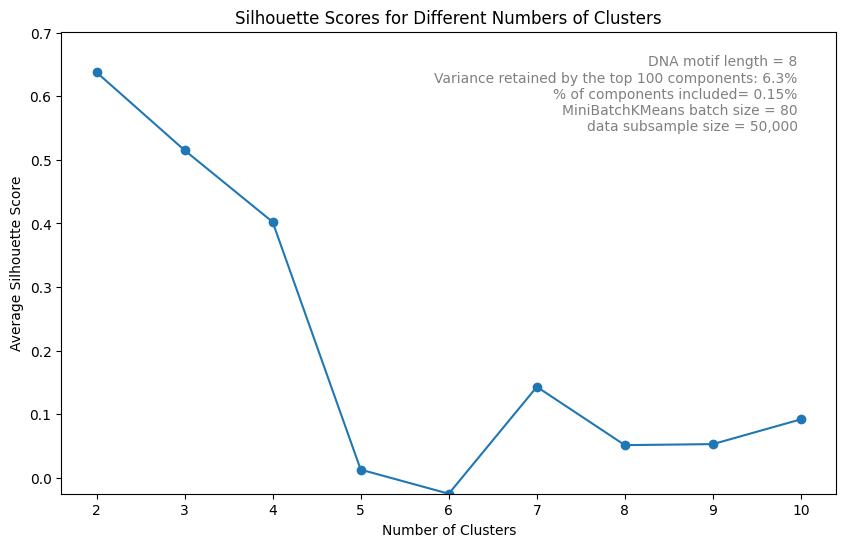

In [14]:
# Plotting the silhouette scores
plt.figure(figsize=(10, 6))
plt.plot(cluster_range, silhouette_avg_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Average Silhouette Score')
plt.title(f'Silhouette Scores for Different Numbers of Clusters')
additional_text = f"DNA motif length = {motif_len}\nVariance retained by the top {SVD_components} components: {variance_retained*100:.1f}%\n% of components included= {round(SVD_components/X.shape[1]*100,2)}%\nMiniBatchKMeans batch size = {batch_size}\ndata subsample size = {samp_size:,}"
plt.text(0.95, 0.95, additional_text, ha='right', va='top', transform=plt.gca().transAxes, fontsize=10, color='gray')
plt.ylim(min(silhouette_avg_scores),max(silhouette_avg_scores) * 1.1) 
plt.show()


Average Binding Intensity per Cluster:
Cluster
9.0    0.903101
7.0    0.885800
1.0    0.874212
8.0    0.811538
0.0    0.806413
5.0    0.769565
4.0    0.719067
2.0    0.665182
3.0    0.640396
6.0    0.607778
Name: Average_Binding, dtype: float64


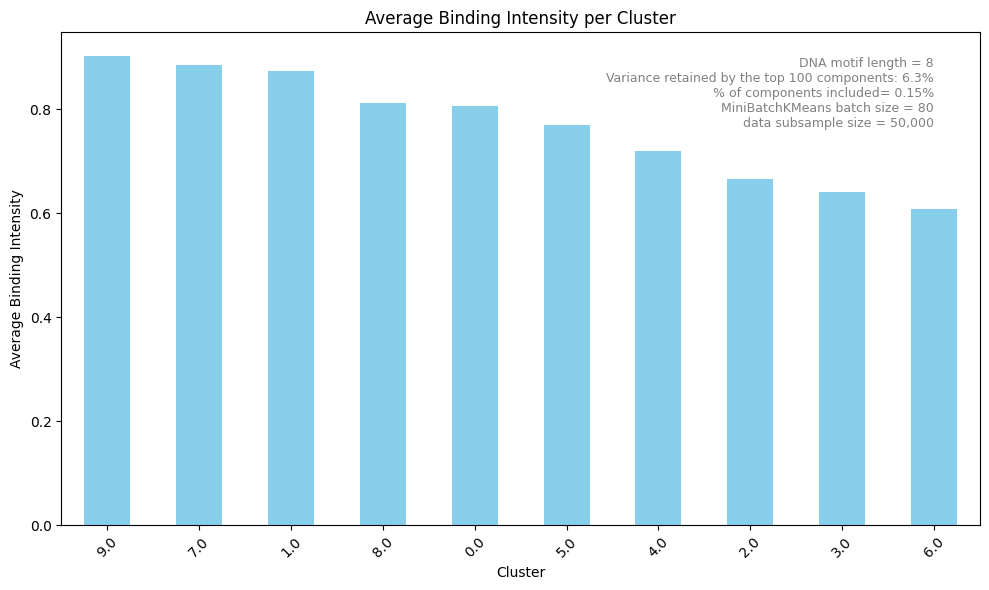

In [15]:
"""
CLUSTER EVALUATION AND ANALYSIS
After clustering, cluster labels are appended to original data, then the average binding intensities per cluster are computed and compared.
"""
# Append cluster labels to the data
data['Cluster'] = np.nan  # Initialize the column
data.loc[subsample_indices, 'Cluster'] = cluster_labels  # Assign labels to the sampled subset

# Compute the average binding intensity per cluster
cluster_binding_avg = data.groupby('Cluster')['Average_Binding'].mean().sort_values(ascending=False)

print("\nAverage Binding Intensity per Cluster:")
print(cluster_binding_avg)

# Plotting
plt.figure(figsize=(10, 6))
cluster_binding_avg.plot(kind='bar', color='skyblue')
plt.title('Average Binding Intensity per Cluster')
plt.xlabel('Cluster')
plt.ylabel('Average Binding Intensity')
plt.xticks(rotation=45)
additional_text = f"DNA motif length = {motif_len}\nVariance retained by the top {SVD_components} components: {variance_retained*100:.1f}%\n% of components included= {round(SVD_components/X.shape[1]*100,2)}%\nMiniBatchKMeans batch size = {batch_size}\ndata subsample size = {samp_size:,}"
plt.text(0.95, 0.95, additional_text, ha='right', va='top', transform=plt.gca().transAxes, fontsize=9, color='gray')
plt.tight_layout()
plt.show()

In [16]:
'''
IDENTIFY AND EXAMINE HIGH INTENSITY CLUSTERS
Identify clusters with the highest binding intensities and examine the common motifs or sequences within these clusters to find potential high-affinity binders.
'''
# Identify high-intensity clusters
high_intensity_clusters = cluster_binding_avg[cluster_binding_avg > cluster_binding_avg.mean()].index

# Filter data for high-intensity clusters and examine common motifs
high_intensity_data = data[data['Cluster'].isin(high_intensity_clusters)]
print("\nSequences in High-Intensity Clusters:")
print(high_intensity_data['Sequence'].value_counts().head(10))  



Sequences in High-Intensity Clusters:
Sequence
GATGTGCTTCCCCCTGCAGAGAGCCTATGAATGGACGTGCAGTCAGGG    2
TTGTATGTAGAAGTACAGTATACAGAGATAAGAATTTACAATATAGTG    2
TTACTGCTGATTAATATCTTGCTAATCATAGGTTATGGAAAGATTGTG    2
TTGCTGCAACTGTTACTGCTGATTAATATCTTGCTAATCATAGGTTAT    2
CCCATCCTTTCATACCTGCCCCCTGTGACCTACTCTCTAGCCTTTCCT    1
GCCCAGAACAGAGTAGGAGTCAGGAAATATTTGCTTAATGAATAAACT    1
TTGCTTAATGAATAAACTGTCAAAGACACATTCCCATGAGCCAGTGAC    1
TGAGCCAGTGACTTTACTGAATTGTAGGACTGTTGCCAATAAAACATA    1
AGCTTTTCATGGGAACATCATTTTCCATGTGGCTCTGATTTCATTCAT    1
AGGGGGACCTGAAGCAAGCTCCTGCCCCATCTCTCCATGTGTCCTGGA    1
Name: count, dtype: int64


In [17]:
# Ensure cluster indices are mapped correctly
unique_clusters = np.unique(kmeans.labels_)  # Gets all unique existing cluster labels
cluster_index_map = {k: idx for idx, k in enumerate(unique_clusters)}  # Map actual labels to continuous indices

# Extract the centroids for the clusters
centroids = kmeans.cluster_centers_

# Find the top 10 k-mers for each high-intensity cluster
top_k_mers_per_cluster = {}
for cluster in high_intensity_clusters:
    if cluster in cluster_index_map:  # Check if cluster index is mapped
        centroid_idx = cluster_index_map[cluster]  # Get mapped index
        centroid = centroids[centroid_idx]
        top_k_mers = np.argsort(centroid)[-10:]  # Get indices of the top 10 k-mers in this centroid
        top_k_mer_features = vectorizer.get_feature_names_out()[top_k_mers]  # Map indices to k-mer names
        top_k_mers_per_cluster[cluster] = top_k_mer_features

# Display top k-mers for high-intensity clusters
for cluster, k_mers in top_k_mers_per_cluster.items():
    print(f"Cluster {cluster} top k-mers:")
    print(k_mers)
    print()


Cluster 9.0 top k-mers:
['aaaaatct' 'aaaacagt' 'aaaaataa' 'aaaaattg' 'aaaaccct' 'aaaaccag'
 'aaaaatac' 'aaaaagtg' 'aaaaaaca' 'aaaaaacc']

Cluster 7.0 top k-mers:
['aaaaaggc' 'aaaacagt' 'aaaaactt' 'aaaaacgc' 'aaaaagtt' 'aaaaagga'
 'aaaacagg' 'aaaaacgt' 'aaaaaacg' 'aaaaaaca']

Cluster 1.0 top k-mers:
['aaaacgag' 'aaaacgat' 'aaaaatca' 'aaaacatt' 'aaaacaaa' 'aaaacagc'
 'aaaaccta' 'aaaaccag' 'aaaaaaca' 'aaaaaaat']

Cluster 8.0 top k-mers:
['aaaacatg' 'aaaaacca' 'aaaaatta' 'aaaaagtg' 'aaaaacgc' 'aaaacact'
 'aaaaattg' 'aaaacaat' 'aaaaactg' 'aaaaaaca']

Cluster 0.0 top k-mers:
['aaaaatgg' 'aaaaaagg' 'aaaaagcc' 'aaaaacta' 'aaaaacca' 'aaaaaaac'
 'aaaaaaag' 'aaaaaaaa' 'aaaaaacg' 'aaaaaaca']

Cluster 5.0 top k-mers:
['aaaacctt' 'aaaacatg' 'aaaaaagg' 'aaaacaga' 'aaaaccct' 'aaaaaata'
 'aaaaaggt' 'aaaaactc' 'aaaaaaca' 'aaaaaaga']



In [19]:
import numpy as np

# Assuming 'vectorizer' is your CountVectorizer instance and 'X' is the transformed k-mer matrix
k_mer_counts = np.sum(X, axis=0)
k_mer_features = vectorizer.get_feature_names_out()

# Sort k-mers by their total counts to see the most common ones
sorted_indices = np.argsort(k_mer_counts).A1[::-1]  # Ensure it's a flat array for indexing
top_global_k_mers = k_mer_features[sorted_indices][:20]

print("Top global k-mers across all data:")
print(top_global_k_mers)

Top global k-mers across all data:
['aaaaaaaa' 'tttttttt' 'cacacaca' 'acacacac' 'tgtgtgtg' 'gtgtgtgt'
 'aaagaaaa' 'ttttaaaa' 'ccagcctg' 'aaaagaaa' 'tttttaaa' 'caggctgg'
 'cagcctgg' 'aaaacaaa' 'ccaggctg' 'tttaaaaa' 'tttgtttt' 'ttttcttt'
 'ttttgttt' 'aaacaaaa']


As noted in the introduction, AACCGGTT is the sequence with perfect binding site matching as described in literature. This analysis yielded a number of somewhat similar sequences, however it seems to be more likely to me that they have been selected alphabetically, rather then due to preferential binding. That said, if this error is ruled out, this would be an extremely useful result demonstrating that there are likely multiple binding sequences for GRHL2 and that a sequence of adenines is the most important component. Regardless, this exercise is a proof of concept that it is fairly straghtforward to group sequences based on base similarity and correlate these groups with experimental binding intensity. Further tweaks are needed to the method along with domain knowledge of GRHL2 domain binding specificity. 

References:
Ming Q, Roske Y, Schuetz A, Walentin K, Ibraimi I, Schmidt-Ott KM, Heinemann U. Structural basis of gene regulation by the Grainyhead/CP2 transcription factor family. Nucleic Acids Res. 2018 Feb 28;46(4):2082-2095. doi: 10.1093/nar/gkx1299. PMID: 29309642; PMCID: PMC5829564.
“Q6ISB3 · GRHL2_HUMAN.” UniProt, www.uniprot.org/uniprotkb/Q6ISB3/entry. Accessed 30 Apr. 2024. 
Tahara, S., Tsuchiya, T., Matsumoto, H. et al. Transcription factor-binding k-mer analysis clarifies the cell type dependency of binding specificities and cis-regulatory SNPs in humans. BMC Genomics 24, 597 (2023). https://doi.org/10.1186/s12864-023-09692-9